ID:24205198

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Task 1
**(a)**   
Load the dataset into Pandas in a Python notebook.

In [4]:
df = pd.read_csv("test_vehicle.csv")
df.head()

,cylinders,horsepower,acceleration,CC,Weight,ModelYear,l/100km
0,8,130.0,12.0,5031,1576,2010,15.69
1,8,165.0,11.5,5736,1661,2010,18.83
2,8,150.0,11.0,5212,1546,2010,15.69
3,8,150.0,12.0,4982,1544,2010,17.66
4,8,140.0,10.5,4949,1552,2010,16.62


**(b)**   

Create CC feature distribution plot

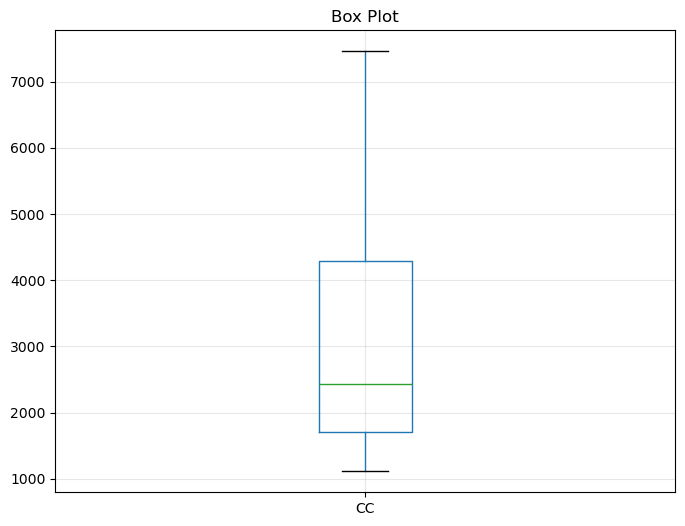

In [7]:
plt.figure(figsize=(8, 6))
df.boxplot(column='CC')
plt.title('Box Plot')
plt.grid(True, alpha=0.3)
plt.show()

Create “l/100km” feature distribution plot

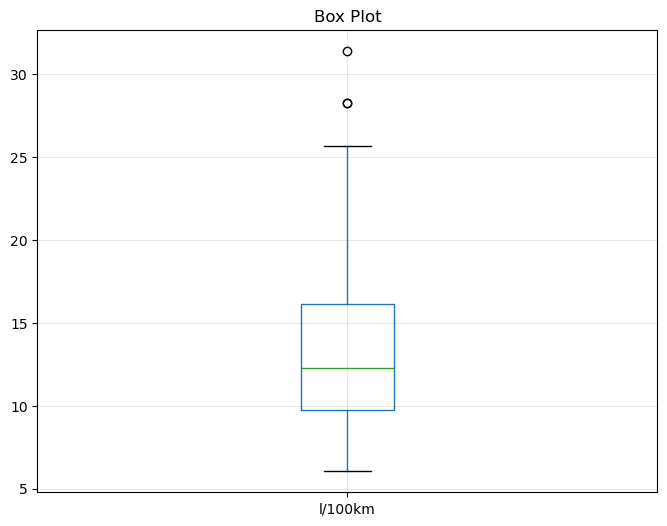

In [9]:
plt.figure(figsize=(8, 6))
df.boxplot(column='l/100km')
plt.title('Box Plot')
plt.grid(True, alpha=0.3)
plt.show()

According to the above figure, we can see that "CC" has no outliers, but "l/100km" has outliers

**(c)**   

Create a time series graph showing average "l/100km"consumption

<Axes: xlabel='ModelYear'>

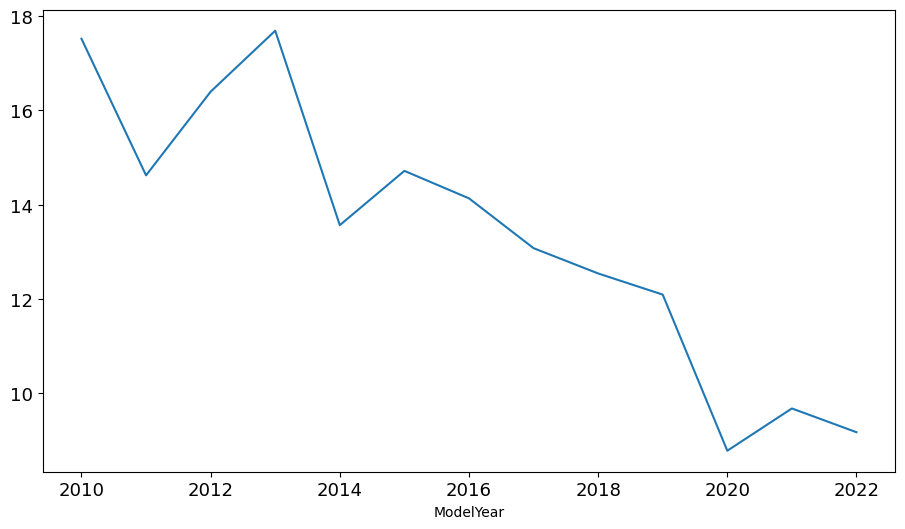

In [13]:
df_year = df.groupby(['ModelYear'])['l/100km'].mean()
df_year.plot(figsize=(11, 6), fontsize=13)

**(d)**   

Find missing values and delete the rows with missing values

In [16]:
print(df.isnull().sum())
df_cleaned = df.dropna()
df_cleaned.isnull().sum()

cylinders        0
horsepower      26
acceleration     0
CC               0
Weight           0
ModelYear        0
l/100km          0
dtype: int64


cylinders       0
horsepower      0
acceleration    0
CC              0
Weight          0
ModelYear       0
l/100km         0
dtype: int64

There are few missing values in this dataset, so we choose to delete them. It is not recommended to use the average to fill missing values ​​because it will affect the accuracy of the data.

### Task 2
**(a)**   

In [19]:
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import MinMaxScaler

In [20]:
target = df_cleaned["l/100km"].values
features = list(df_cleaned.columns)
features.remove("l/100km")
data = df_cleaned[features]
data.head()

,cylinders,horsepower,acceleration,CC,Weight,ModelYear
0,8,130.0,12.0,5031,1576,2010
1,8,165.0,11.5,5736,1661,2010
2,8,150.0,11.0,5212,1546,2010
3,8,150.0,12.0,4982,1544,2010
4,8,140.0,10.5,4949,1552,2010


In [21]:
target = [int(label) for label in target]
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(data, target)
result = permutation_importance(knn, data, target, n_repeats=10, random_state=0)

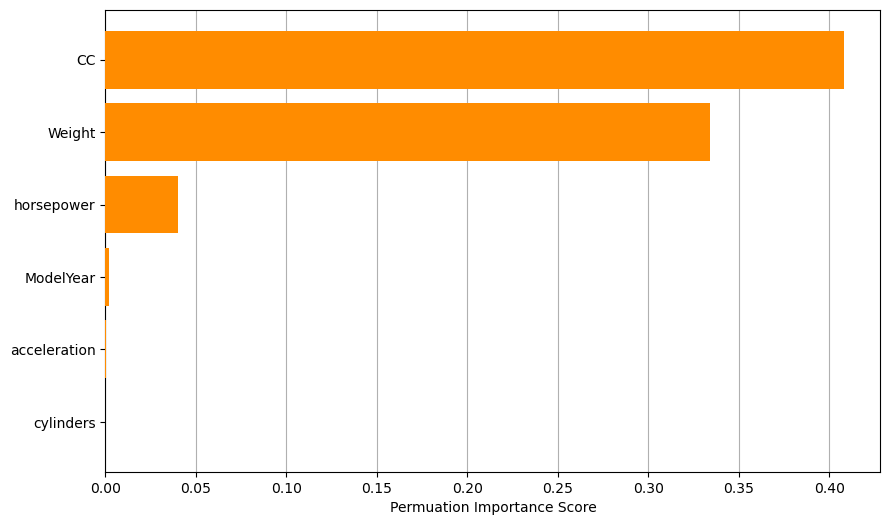

In [22]:
sorted_idx = result.importances_mean.argsort()
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(data.columns[sorted_idx], result.importances[sorted_idx].mean(axis=1).T, color="darkorange", zorder=3)
ax.xaxis.grid(True)
ax.set_xlabel("Permuation Importance Score");

According to the above figure, we can see that CC, weight, horsepower, and modelYear are the most predictive features.The four features horsepower, modelYear, acceleration, and cylinders have the worst predictive power.

**(b)**   


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [26]:
y = df_cleaned["l/100km"]
X = df_cleaned.drop("l/100km", axis=1)
X.head()

,cylinders,horsepower,acceleration,CC,Weight,ModelYear
0,8,130.0,12.0,5031,1576,2010
1,8,165.0,11.5,5736,1661,2010
2,8,150.0,11.0,5212,1546,2010
3,8,150.0,12.0,4982,1544,2010
4,8,140.0,10.5,4949,1552,2010


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("%d training examples, %d test examples" % (X_train.shape[0], X_test.shape[0]))

297 training examples, 75 test examples


In [28]:
model = LinearRegression()
m = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Looking at the level of error in the perdictions by calculating the mean squared error:

In [30]:
mse = mean_squared_error(y_test, y_pred)
print("MSE=%.2f" % mse)

MSE=3.04


generate a scatter plot of our predictions versus actual rental counts :

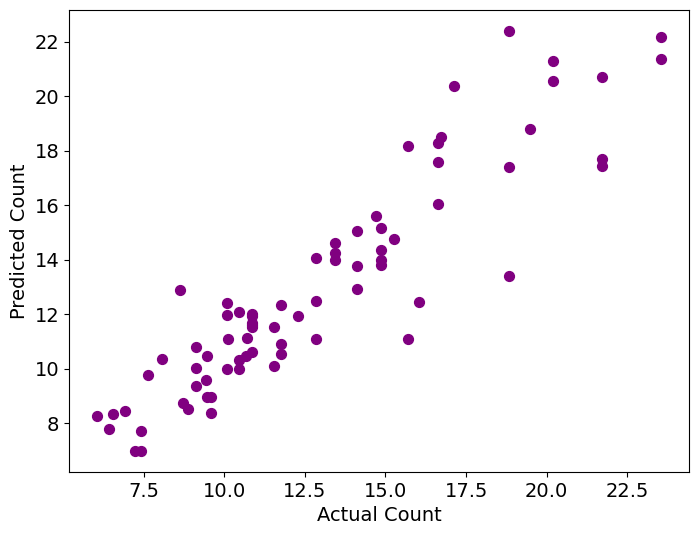

In [32]:
df_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
ax = df_comparison.plot.scatter("Actual", "Predicted", fontsize=14, figsize=(8, 6), s=50, color="purple")
plt.xlabel("Actual Count", fontsize=14)
plt.ylabel("Predicted Count", fontsize=14);

**(c)**  


In [34]:
y = df_cleaned["l/100km"]
X = df_cleaned.drop(["l/100km","acceleration","cylinders"], axis=1)
X.head()

,horsepower,CC,Weight,ModelYear
0,130.0,5031,1576,2010
1,165.0,5736,1661,2010
2,150.0,5212,1546,2010
3,150.0,4982,1544,2010
4,140.0,4949,1552,2010


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("%d training examples, %d test examples" % (X_train.shape[0], X_test.shape[0]))
model = LinearRegression()
m = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

297 training examples, 75 test examples


In [36]:
mse = mean_squared_error(y_test, y_pred)
print("MSE=%.2f" % mse)

MSE=2.07


Use the worst four

In [38]:
y = df_cleaned["l/100km"]
X = df_cleaned.drop(["l/100km","CC","Weight"], axis=1)
X.head()

,cylinders,horsepower,acceleration,ModelYear
0,8,130.0,12.0,2010
1,8,165.0,11.5,2010
2,8,150.0,11.0,2010
3,8,150.0,12.0,2010
4,8,140.0,10.5,2010


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("%d training examples, %d test examples" % (X_train.shape[0], X_test.shape[0]))
model = LinearRegression()
m = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE=%.2f" % mse)

297 training examples, 75 test examples
MSE=3.63


Calculate the mean squared error using all six features:MSE=1.99
Calculate the mean squared error using the four most predictive features:MSE=1.83
Calculate the mean squared error using the four worst predictive features:MSE=3.84